In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Conv1D, MaxPooling1D

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

In [13]:
(X_tn0, y_tn0), (X_te0, y_test) = imdb.load_data(num_words=2000)

In [5]:
X_tn0.shape

(25000,)

In [6]:
y_tn0.shape

(25000,)

In [7]:
X_te0.shape

(25000,)

In [8]:
y_te0.shape

(25000,)

In [20]:
X_train = X_tn0[:20000]
y_train = y_tn0[:20000]
X_valid = X_tn0[20000:]
y_valid = y_tn0[20000:]

In [21]:
X_train[0] # original data -> number mapping

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 1920,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 

In [22]:
set(y_test)

{np.int64(0), np.int64(1)}

In [23]:
len(set(y_test))

2

In [ ]:
X_train = sequence.pad_sequences(
    X_train, maxlen=100
)  # feature data 길이 일치시키기, maxlen 넘는 데이터는 삭제
X_valid = sequence.pad_sequences(X_valid, maxlen=100)
X_test = sequence.pad_sequences(X_te0, maxlen=100)

In [30]:
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=100))
model.add(Conv1D(50, kernel_size=3, padding="valid", activation="relu"))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100, activation="tanh"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape  ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ embedding_1        │ ?             │       0 │
│ (Embedding)        │               │ (unbui… │
├────────────────────┼───────────────┼─────────┤
│ conv1d (Conv1D)    │ ?             │       0 │
│                    │               │ (unbui… │
├────────────────────┼───────────────┼─────────┤
│ max_pooling1d_1    │ ?             │       0 │
│ (MaxPooling1D)     │               │         │
├────────────────────┼───────────────┼─────────┤
│ lstm_1 (LSTM)      │ ?             │       0 │
│                    │               │ (unbui… │
├────────────────────┼───────────────┼─────────┤
│ dropout_1          │ ?             │       0 │
│ (Dropout)          │               │         │
├────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)    │ ?             │       0 │
│                    │               │ (unbui… │
└────────────────────┴───────────────┴─────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
hist = model.fit(
    X_train, y_train, batch_size=100, epochs=10, validation_data=(X_valid, y_valid)
)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9725 - loss: 0.0797 - val_accuracy: 0.7984 - val_loss: 0.6099
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9736 - loss: 0.0747 - val_accuracy: 0.7948 - val_loss: 0.7520
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9647 - loss: 0.0891 - val_accuracy: 0.8136 - val_loss: 0.6706
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9671 - loss: 0.0891 - val_accuracy: 0.8150 - val_loss: 0.6623
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9858 - loss: 0.0412 - val_accuracy: 0.8148 - val_loss: 0.7346
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.8150 - val_loss: 0.7972
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.8114 - val_loss: 0.9038
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9966 - loss: 0.0137 - val_accu

In [35]:
model.evaluate(X_train, y_train)[1]

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9988 - loss: 0.0052


0.9988499879837036

In [36]:
model.evaluate(X_valid, y_valid)[1]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8098 - loss: 1.0798


0.8098000288009644

In [37]:
model.evaluate(X_test, y_test)[1]

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8189 - loss: 1.0115


0.818880021572113

In [38]:
epoch = np.arange(1, 11)
acc_train = hist.history["accuracy"]
acc_valid = hist.history["val_accuracy"]
loss_train = hist.history["loss"]
loss_valid = hist.history["val_loss"]

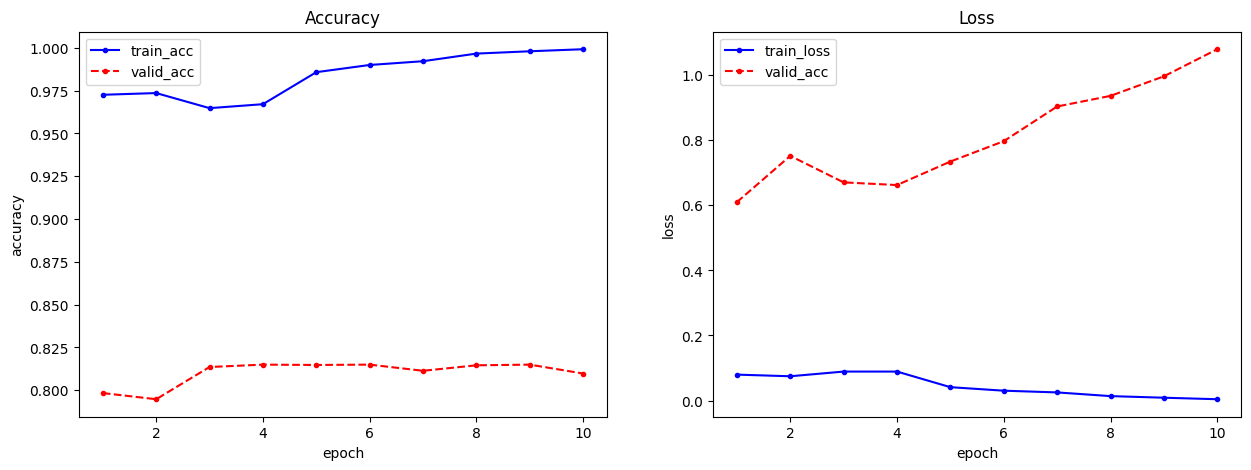

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(epoch, acc_train, "b", marker=".", label="train_acc")
plt.plot(epoch, acc_valid, "r--", marker=".", label="valid_acc")
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.subplot(122)
plt.plot(epoch, loss_train, "b", marker=".", label="train_loss")
plt.plot(epoch, loss_valid, "r--", marker=".", label="valid_acc")
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()